<a href="https://colab.research.google.com/github/maggieliuzzi/machine_learning/blob/master/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Batch Gradient Descent**
Uses the whole training batch to compute the gradients at every step.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
print(X)
print(y)

[[1.80794562]
 [0.42364256]
 [0.06048084]
 [1.15880479]
 [0.02792316]
 [1.3089245 ]
 [1.12877811]
 [1.77135031]
 [1.94722848]
 [0.03438215]
 [1.18313764]
 [0.65341018]
 [1.8116301 ]
 [1.11964389]
 [0.00446961]
 [1.14799944]
 [0.16588108]
 [0.53683762]
 [0.76708011]
 [0.58424927]
 [0.55815688]
 [1.41545323]
 [0.79205877]
 [0.30693781]
 [1.86267432]
 [0.32262196]
 [1.59863243]
 [0.7062173 ]
 [0.9014392 ]
 [1.40487597]
 [1.71467785]
 [0.18415388]
 [1.5013147 ]
 [1.73585041]
 [1.39622401]
 [0.21427371]
 [1.11180235]
 [1.42337634]
 [0.28813047]
 [1.31339768]
 [0.99198661]
 [1.69717364]
 [0.22415017]
 [0.53852142]
 [1.88041951]
 [0.3351729 ]
 [1.81835332]
 [0.79845739]
 [0.30934184]
 [1.70783333]
 [0.63836387]
 [1.27879385]
 [0.82599984]
 [1.35280967]
 [0.27361363]
 [0.28371923]
 [1.3579846 ]
 [0.0636915 ]
 [0.12849563]
 [1.60602408]
 [0.58616331]
 [1.70153204]
 [0.80483091]
 [1.32828632]
 [1.39464376]
 [1.53539887]
 [0.43923226]
 [0.96771794]
 [0.94619145]
 [1.23919106]
 [1.51258101]
 [0.84

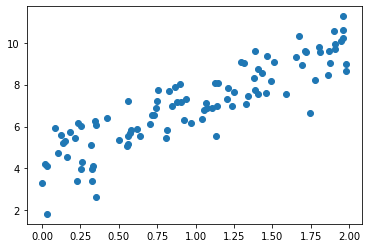

In [15]:
plt.scatter(X, y)

In [19]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
X_b

array([[1.        , 1.80794562],
       [1.        , 0.42364256],
       [1.        , 0.06048084],
       [1.        , 1.15880479],
       [1.        , 0.02792316],
       [1.        , 1.3089245 ],
       [1.        , 1.12877811],
       [1.        , 1.77135031],
       [1.        , 1.94722848],
       [1.        , 0.03438215],
       [1.        , 1.18313764],
       [1.        , 0.65341018],
       [1.        , 1.8116301 ],
       [1.        , 1.11964389],
       [1.        , 0.00446961],
       [1.        , 1.14799944],
       [1.        , 0.16588108],
       [1.        , 0.53683762],
       [1.        , 0.76708011],
       [1.        , 0.58424927],
       [1.        , 0.55815688],
       [1.        , 1.41545323],
       [1.        , 0.79205877],
       [1.        , 0.30693781],
       [1.        , 1.86267432],
       [1.        , 0.32262196],
       [1.        , 1.59863243],
       [1.        , 0.7062173 ],
       [1.        , 0.9014392 ],
       [1.        , 1.40487597],
       [1.

**Analytical Solution**

In [20]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.33848259],
       [2.76951262]])

[[4.33848259]
 [9.87750783]]


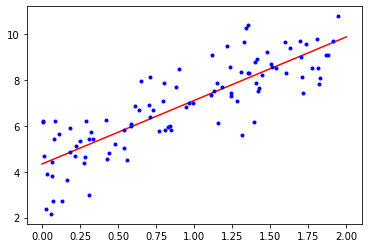

In [21]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print(y_predict)
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

Batch Gradient Descent

In [0]:
eta = 0.1 # learning rate 
n_iterations = 1000 
m=100
theta = np.random.randn(2,1) # random initialization

In [0]:
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
  theta = theta - eta * gradients

[[4.33848259]
 [9.87750783]]


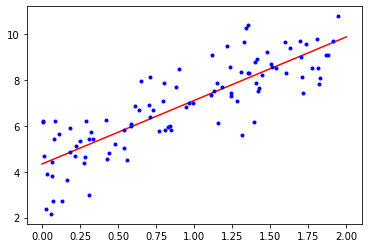

In [24]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta)
print(y_predict)
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

**Stochastic Gradient Descent**
Picks a random instance in the training set at every step and computes the gradients based only on that single instance.
It can be enhanced by adding a learning schedule.

In [0]:
n_epochs = 50  # faster
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t): 
  return t0/(t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs): 
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

[[4.38074578]
 [9.94737893]]


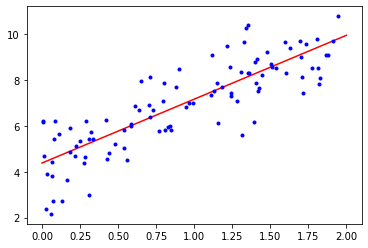

In [27]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta)
print(y_predict)
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

In [29]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1) 
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [30]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.31559679]), array([2.78111951]))

**Mini-Batch Gradient Descent**
Computes the gradients on small random sets of instances.
(In comparison to SGD), possible performance boost from hardware optimization of matrix operations, especially when using GPUs.